<a href="https://colab.research.google.com/github/ruoroj/Catsn-Dogs/blob/main/Copy_of_CandD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

### Understanding the Context

The database is composed of several hundred images of cats and Dogs. Using these images we will train a amchine learning model to predict the difference between cats and dogs. 

### Specifying the Question

The database has picture of cats and dogs that should be used to cllasify a picture as either a dog or cat. 

### Metrics for Success

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 80%.

### The Experimental Design

The experimental design for this project is as follows:

- Loading the libraries and dataset
- Data cleaning and preparation
- Making predictions using the different models that I've created
- Assesing the accuracy of the models created
- Making conclusions and challenging the solution

# 2. Reading the Data

In [5]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import scipy as sp
import tensorflow as tf
import warnings
import cv2

warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
from google.colab import drive
drive.mount('/content/drive')
from zipfile import ZipFile as zf
import shutil
import random
from matplotlib import pyplot as plt



Mounted at /content/drive


In [7]:
# EXTRACT THE DATA FROM G-DRIVE
test_zip = zf('/content/drive/MyDrive/jojo/cat/test1.zip', 'r')
test_zip.extractall('./tmp')
test_zip.close()
train_zip = zf('/content/drive/MyDrive/jojo/cat/train.zip', 'r')
train_zip.extractall('./tmp')
train_zip.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

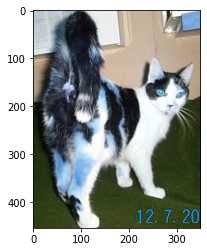

In [8]:
# Checking if there is content in the train data
train_data = '/content/tmp/train/'

x = os.listdir(train_data)
for img in os.listdir(train_data):
  img_array = cv2.imread(os.path.join(train_data, img))
  plt.imshow(img_array)
  plt.show()
  break

In [9]:
# Making a directory to store cata and dog pictures separately.
images = './tmp/train'
pet_images = './pet-images'
cats = os.path.join(pet_images,'cat')
dogs = os.path.join(pet_images,'dog')
os.mkdir(pet_images)
os.mkdir(cats)
os.mkdir(dogs)

In [10]:
# Spliting the cats and dog images into different folders
for i in os.listdir(images):
    if i.split('.')[0] == 'cat':
        src = os.path.join(images,i)
        dst = os.path.join(cats,i)
        shutil.copyfile(src,dst)
    elif i.split('.')[0] == 'dog':
        src = os.path.join(images,i)
        dst = os.path.join(dogs,i)
        shutil.copyfile(src,dst)

In [11]:
# check the number of images in each folder
print(len(os.listdir(cats)))
print(len(os.listdir(dogs)))

12500
12500


In [12]:
# spliting the images into training and validation sets
base_dir = './dogs-vs-cats'
os.mkdir(base_dir)
train = os.path.join(base_dir,'training')
validation = os.path.join(base_dir,'validation')
train_cat = os.path.join(train,'cats')
train_dog = os.path.join(train,'dogs')
validation_cat = os.path.join(validation,'cats')
validation_dog = os.path.join(validation,'dogs')


In [13]:
# Defining the test folder and populating it with data

test_images = './tmp/test1'
test = os.path.join(base_dir,'test')
test_folder = os.path.join(test,'test_folder')
os.mkdir(test)
os.mkdir(test_folder)

for i in os.listdir(test_images):
    src = os.path.join(test_images,i)
    dst = os.path.join(test_folder,i)
    shutil.copyfile(src,dst)

In [14]:
# Check the length of the test folder
print(len(os.listdir(test_folder)))

12500


In [15]:
# Making the directories of the train, and validation datasets. 

os.mkdir(train)
os.mkdir(validation)
os.mkdir(train_cat)
os.mkdir(train_dog)
os.mkdir(validation_cat)
os.mkdir(validation_dog)

In [16]:
# Defining Function of spliting the dataset into 

def split_data(source,training,validation,split):
    data = os.listdir(source)
    data = random.sample(data,len(data))
    for id,file in enumerate(data):
        if (os.path.getsize(source) != 0) and (id < len(data) * split):
            src = os.path.join(source,file)
            dst = os.path.join(training,file)
            shutil.copyfile(src,dst)
        elif (os.path.getsize(source) != 0) and (id >= len(data) * split):
            src = os.path.join(source,file)
            dst = os.path.join(validation,file)
            shutil.copyfile(src,dst)
            
split = 0.8
split_data(cats,train_cat,validation_cat,split)
split_data(dogs,train_dog,validation_dog,split)

In [17]:
# Check the lenght of the differnet splits

print(len(os.listdir(train_cat)))
print(len(os.listdir(train_dog)))
print(len(os.listdir(validation_cat)))
print(len(os.listdir(validation_dog)))

10000
10000
2500
2500


## Tensorflow Modelling 

In [18]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
WIDTH = 150
HEIGHT = 150
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [19]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        3

In [20]:
model.compile(loss="binary_crossentropy", 
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["acc"])
print(" Model compiled.")

 Model compiled.


In [21]:
datagen = ImageDataGenerator(rescale=1./255,
                            #featurewise_center=True,
                            #featurewise_std_normalization=True,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest'
                            )

valid_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = datagen.flow_from_directory(train,
                                             target_size=(150,150),
                                             batch_size=64,
                                             class_mode='binary'
                                             )

validation_generator = valid_datagen.flow_from_directory(validation,
                                           target_size=(150,150),
                                           batch_size=64,
                                           class_mode='binary'
                                           )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [23]:
history = model.fit(train_generator,
                       steps_per_epoch=150,
                       epochs=50,
                       validation_data=validation_generator,
                       validation_steps=50,
                       verbose = 2 
                   )

Epoch 1/50
150/150 - 129s - loss: 1.0356 - acc: 0.5345 - val_loss: 1.4458 - val_acc: 0.4988
Epoch 2/50
150/150 - 79s - loss: 0.7721 - acc: 0.5591 - val_loss: 1.9928 - val_acc: 0.5019
Epoch 3/50
150/150 - 81s - loss: 0.6954 - acc: 0.5766 - val_loss: 1.4618 - val_acc: 0.5084
Epoch 4/50
150/150 - 78s - loss: 0.6648 - acc: 0.6076 - val_loss: 1.2195 - val_acc: 0.5483
Epoch 5/50
150/150 - 77s - loss: 0.6600 - acc: 0.6068 - val_loss: 1.2391 - val_acc: 0.5251
Epoch 6/50
150/150 - 79s - loss: 0.6395 - acc: 0.6349 - val_loss: 0.8933 - val_acc: 0.5984
Epoch 7/50
150/150 - 78s - loss: 0.6316 - acc: 0.6451 - val_loss: 1.2297 - val_acc: 0.5608
Epoch 8/50
150/150 - 78s - loss: 0.6184 - acc: 0.6571 - val_loss: 1.0401 - val_acc: 0.6135
Epoch 9/50
150/150 - 78s - loss: 0.6161 - acc: 0.6596 - val_loss: 0.8376 - val_acc: 0.6506
Epoch 10/50
150/150 - 78s - loss: 0.6077 - acc: 0.6709 - val_loss: 0.9235 - val_acc: 0.6616
Epoch 11/50
150/150 - 78s - loss: 0.5973 - acc: 0.6796 - val_loss: 0.9593 - val_acc: 0.6

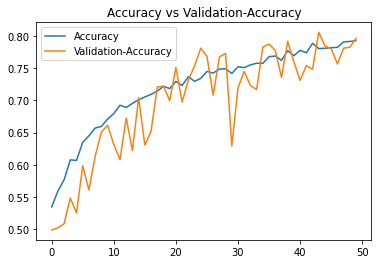

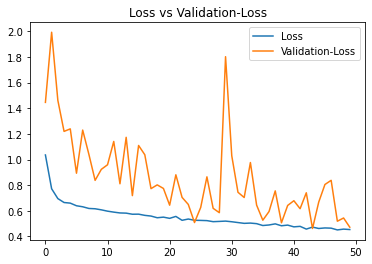

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.title('Accuracy vs Validation-Accuracy')
plt.plot(epoch,acc,label='Accuracy')
plt.plot(epoch,val_acc,label='Validation-Accuracy')
plt.legend()
plt.figure()

plt.title('Loss vs Validation-Loss')
plt.plot(epoch,loss,label='Loss')
plt.plot(epoch,val_loss,label='Validation-Loss')
plt.legend()
plt.show()

# Validation

In [35]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2021-08-15 20:57:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   102MB/s    in 0.8s    

2021-08-15 20:57:53 (102 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model2.summary()

NameError: ignored

In [48]:
train_datagen_aug = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator_aug = train_datagen_aug.flow_from_directory(train,
                                                   batch_size=10,
                                                   class_mode='binary',
                                                   target_size=(150,150))

validation_datagen_aug = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator_aug = validation_datagen_aug.flow_from_directory(validation,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [1]:
history2 = model2.fit(train_generator_aug,
                   validation_data=validation_generator_aug,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_steps=50,
                   verbose=2)

NameError: ignored